# Dataset Gabungan (3) dg Fasttext - BiLSTM 

# Install Lib

In [1]:
import nltk
import os
import pandas as pd

#nltk.download("popular")
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from keras.preprocessing import sequence
import numpy as np
from keras.preprocessing import sequence
from io import BytesIO
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Init Data

In [2]:
folder_path = '../../All Dataset'
file_name = 'Prepocessed (3).xlsx'
file_path = os.path.join(folder_path, file_name)

df = pd.read_excel(file_path)
df

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"['absen', 'online', 'rambah', 'usaha', 'ganti'...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"['manfaat', 'absen', 'online', 'usaha', 'mari'...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"['data', 'hrd', 'tanggung', 'gaji', 'karyawan'...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"['karyawan', 'laku', 'absen', 'tulis', 'jam', ...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"['absen', 'online', 'rupa', 'sistem', 'absensi...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekaligu...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekaligu...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"['donald', 'trump', 'lawan', 'biden', 'tahana'...",donald trump lawan biden tahana coba serang bi...
2498,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"['utas', 'taibbi', 'baca', 'cuplik', 'buah', '...",utas taibbi baca cuplik buah serial dasar ribu...
2499,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"['taibbi', 'twitter', 'pelan', 'halang', 'hala...",taibbi twitter pelan halang halang alat kontro...
2500,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai po

# Split Data

In [3]:
# Misalkan menggunakan `content_lemma` sebagai input
X = df['content_lemma'].values
# Variabel target y adalah kombinasi dari empat label
y = df['labels'].values

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split data jadi training 70% dan testing 30%, stratify supaya distribusi label seimbang
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Cek ukuran data
print(f'Jumlah data train: {len(X_train)}')
print(f'Jumlah data test: {len(X_test)}')

Jumlah data train: 1751
Jumlah data test: 751


In [5]:
import pandas as pd

# Convert to DataFrame before saving
df_train = pd.DataFrame({'content_lemma': X_train, 'labels': y_train})
df_test = pd.DataFrame({'content_lemma': X_test, 'labels': y_test})

# Save to CSV
df_train.to_csv('train_data.csv', index=False)
df_test.to_csv('test_data.csv', index=False)

In [6]:
#Y = dataset['labels']
#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
# Setelah pemisahan, pastikan X_test dan y_test memiliki jumlah yang sama
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (1751,)
Ukuran y_train: (1751,)
Ukuran X_test: (751,)
Ukuran y_test: (751,)


In [7]:
import tensorflow as tf
y_train_dl = tf.keras.utils.to_categorical(y_train)
y_test_dl = tf.keras.utils.to_categorical(y_test)

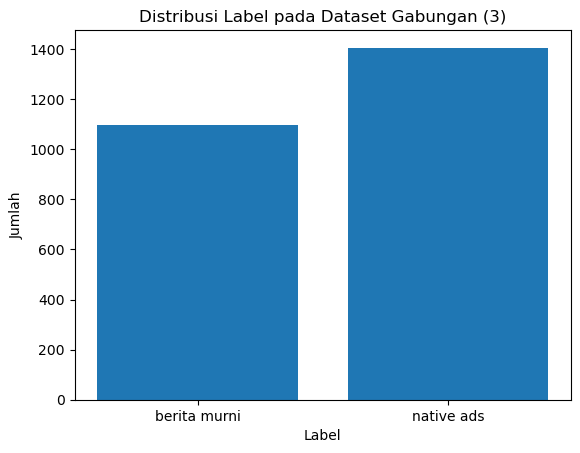

Jumlah data di Distribusi Label pada Dataset Gabungan (3): 2502
label-berita
berita murni    1097
native ads      1405
Name: count, dtype: int64
-------------------------


In [8]:
import matplotlib.pyplot as plt

def plot_label_distribution(df, title):
    counts = df['label-berita'].value_counts().sort_index()
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Jumlah')
    plt.show()
    print(f"Jumlah data di {title}: {len(df)}")
    print(counts)
    print('-------------------------')

# Contoh pemanggilan fungsi dengan DataFrame berbeda
plot_label_distribution(df, 'Distribusi Label pada Dataset Gabungan (3)')

# Word Embedding Fasttext

In [9]:
# Step 1: Load Pretrained FastText Embeddings
embedding_vectors_fasttext = {}
embedding_file_path = "E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Pretrained embeddings/cc.id.300-002.vec"
with open(embedding_file_path, "r", encoding="utf-8") as file:
    file.readline()  # skip header
    for line in file:
        word, vector = line.split(maxsplit=1)
        vector = np.fromstring(vector, "float32", sep=" ")
        embedding_vectors_fasttext[word] = vector

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
# Step 2: Tokenize your text data (assuming `X_train` and `X_test` are your text datasets)
max_fatures = 100000
#Tensorflow Tokenizer
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(X_train)

# Convert text to sequence of integers (list of indices)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [12]:
# Step 3: Pad sequences so that they have the same length
max_length = 257  # asumsi maksimal panjang sequence
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

print(X_train_pad.shape)
print(X_test_pad.shape)

(1751, 257)
(751, 257)


In [13]:
# Step 4: Create an embedding matrix based on the FastText vectors
vocab_size = len(tokenizer.index_word)+1
embedding_dim = 300  # We use the FastText embedding dimension

embedding_matrix = np.zeros((vocab_size, embedding_dim))  # Initialize matrix with zeros

for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_vectors_fasttext.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  # Assign the embedding vector to the matrix
        
# Now you can use `embedding_matrix` for your model input
# Example: You can create a Keras Embedding layer like this:
# embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False)

# Step 5: Now X_train_pad and X_test_pad are ready for training with the embedding layer

In [14]:
# Step 1: Menyimpan embedding matrix
filename_npy = 'E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Embeddings Model/FT_svm_embedding.npy'
# Simpan embedding matrix ke dalam file .npy
np.save(filename_npy, embedding_matrix)

print(f"Embedding matrix saved to {filename_npy}")

Embedding matrix saved to E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Embeddings Model/FT_svm_embedding.npy


# Split Word Embedding to Training-Testing

In [15]:
# # Convert training and testing data to vectors using the word embeddings
# X_train_ft = get_weights(X_train, embedding_matrix)  # Replace with your actual conversion function
# X_test_ft = get_weights(X_test, embedding_matrix)

X_train_embed = embedding_matrix[X_train_pad]
X_test_embed = embedding_matrix[X_test_pad]

In [16]:
#Langkah 1: Menghitung rata-rata vektor kata untuk setiap dokumen
# Model seperti SVM mengharuskan data inputnya dalam bentuk vektor berdimensi tetap. Namun, teks bisa memiliki 
#panjang yang bervariasi (misalnya, kalimat yang lebih pendek atau lebih panjang).
#Setiap kata dalam teks memiliki vektor yang diperoleh dari model seperti FastText. Tapi jika kita ingin mewakili 
#seluruh kalimat atau paragraf dengan satu vektor, kita perlu cara untuk menggabungkan vektor-vektor kata tersebut menjadi satu vektor representasi yang tetap ukurannya.
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Fungsi untuk menghitung rata-rata vektor kata untuk setiap kalimat
def get_average_word_vector(X, tokenizer, embedding_vectors_fasttext, embedding_dim=300):
    # Hasil rata-rata vektor untuk setiap dokumen
    document_vectors = []
    for sequence in X:
        word_vectors = []
        for idx in sequence:
            word = tokenizer.index_word.get(idx)
            if word in embedding_vectors_fasttext:
                word_vectors.append(embedding_vectors_fasttext[word])
        if word_vectors:
            document_vectors.append(np.mean(word_vectors, axis=0))  # Rata-rata vektor kata
        else:
            document_vectors.append(np.zeros(embedding_dim))  # Jika tidak ada kata yang cocok
    return np.array(document_vectors)

# Mendapatkan rata-rata vektor untuk X_train_pad dan X_test_pad
X_train_vectors = get_average_word_vector(X_train_pad, tokenizer, embedding_vectors_fasttext)
X_test_vectors = get_average_word_vector(X_test_pad, tokenizer, embedding_vectors_fasttext)

# Menyiapkan label untuk klasifikasi (misal binary classification)
# Jika y_train dan y_test dalam bentuk one-hot encoding, ubah ke bentuk 1D
#y_train = np.argmax(y_train, axis=1)
#y_test = np.argmax(y_test, axis=1)

# Pastikan sekarang y_train dan y_test dalam bentuk 1D
print(y_train.shape)  # Harus (n_samples,)
print(y_test.shape)   # Harus (n_samples,)

(1751,)
(751,)


In [17]:
# Periksa ukuran data input dan label
print(f'Ukuran X_test_pad: {X_test_pad.shape}')
print(f'Ukuran X_test_vectors: {X_test_vectors.shape}')
print(f'Ukuran y_test: {y_test.shape}')

# Pastikan X_test memiliki jumlah yang sesuai dengan y_test
print(f"Jumlah data X_test: {len(X_test)}")
print(f"Jumlah label y_test: {len(y_test)}")

Ukuran X_test_pad: (751, 257)
Ukuran X_test_vectors: (751, 300)
Ukuran y_test: (751,)
Jumlah data X_test: 751
Jumlah label y_test: 751


In [18]:
print(type(X_train_embed))
print(X_train_embed.shape)
print(X_train_embed.dtype)


<class 'numpy.ndarray'>
(1751, 257, 300)
float64


In [19]:
# Ubah ke average embedding per kalimat
X_train_features = np.mean(X_train_embed, axis=1)  # shape (524, 300)
X_test_features = np.mean(X_test_embed, axis=1)  # shape (225, 300)

print(X_train_features.shape)  # harus (524, 300)
print(X_test_features.shape)  # harus (225, 300)


(1751, 300)
(751, 300)


# Random Forest

In [20]:
# Langkah 2: Menggunakan GridSearchCV untuk Menentukan n_estimators
# Menyiapkan model Random Forest
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier(random_state=42)

# Menentukan parameter yang ingin diuji
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],  # Daftar nilai n_estimators yang ingin diuji
    'max_depth': [None, 10, 20, 30],  # Menambahkan parameter lain yang bisa dicoba
    'min_samples_split': [2, 5, 10]
}

# Melakukan Grid Search dengan cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Melatih GridSearchCV dengan data pelatihan
grid_search.fit(X_train_features, y_train)

# Menampilkan hasil terbaik
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best cross-validation score: 0.8978


In [21]:
# Langkah 2: Menilai Hasil
# Gunakan parameter terbaik untuk melatih model akhir
best_rf_model = grid_search.best_estimator_

# Prediksi dengan data uji
y_pred_rf = best_rf_model.predict(X_test_features)

# Evaluasi model
print(f"Akurasi model dengan parameter terbaik: {accuracy_score(y_test, y_pred_rf):.4f}")

Akurasi model dengan parameter terbaik: 0.9041


In [22]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder untuk mengonversi label ke format numerik
encoder = LabelEncoder()

# Konversi y_test dan y_pred_svm ke numerik
y_test_numeric = encoder.fit_transform(y_test)
y_pred_rf_numeric = encoder.transform(y_pred_rf)

# Cek hasil konversi
print(f"Contoh y_test: {y_test[:10]}")
print(f"Contoh y_test_numeric: {y_test_numeric[:10]}")


Contoh y_test: [1 1 0 0 1 1 0 1 1 1]
Contoh y_test_numeric: [1 1 0 0 1 1 0 1 1 1]


## Get Evaluate Score

In [23]:
# Prediction
from sklearn.metrics import classification_report

y_pred = best_rf_model.predict(X_test_features) 
y_true = y_test_dl

# Periksa tipe data
print(f'y_true dtype: {y_true.dtype}, shape: {y_true.shape}')
print(f'y_pred dtype: {y_pred.dtype}, shape: {y_pred.shape}')

# Ubah y_true dari one-hot encoded ke label kelas
if y_true.ndim == 2:
    y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, y_pred))

y_true dtype: float64, shape: (751, 2)
y_pred dtype: int64, shape: (751,)
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       329
           1       0.93      0.90      0.91       422

    accuracy                           0.90       751
   macro avg       0.90      0.90      0.90       751
weighted avg       0.90      0.90      0.90       751



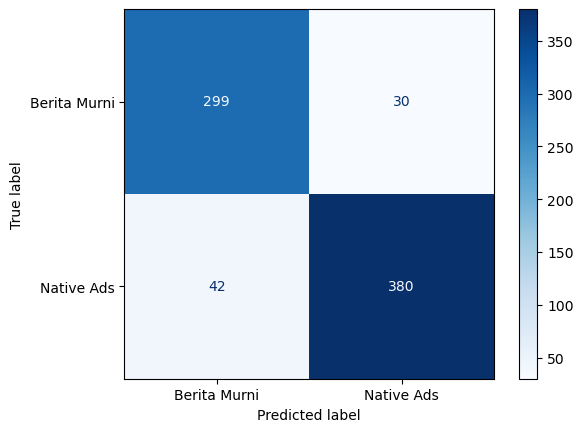

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["Berita Murni", "Native Ads"]

cm = confusion_matrix(y_test_numeric, y_pred_rf_numeric)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_test_numeric, y_pred_rf_numeric,average='macro')
print('Precision : ',format(precision))
print('Recall    : ',format(recall))
print('F-score   : ',format(fscore))
print('Accuracy : ',accuracy_score(y_test_numeric, y_pred_rf_numeric))

Precision :  0.9018310564337315
Recall    :  0.9046442616574712
F-score   :  0.9029994259471872
Accuracy :  0.9041278295605859


## ROC

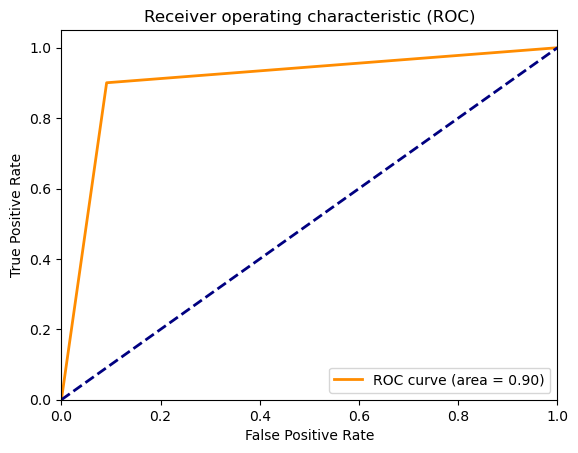

In [26]:
import numpy as np
from sklearn import metrics

y = np.array(y_test_numeric)

scores = np.array(y_pred_rf_numeric)
fpr, tpr, thresholds = metrics.roc_curve(y_test_numeric, y_pred_rf_numeric)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_numeric, y_pred_rf_numeric)
auc_rf = auc(fpr_rf, tpr_rf)
auc_rf

0.9046442616574712

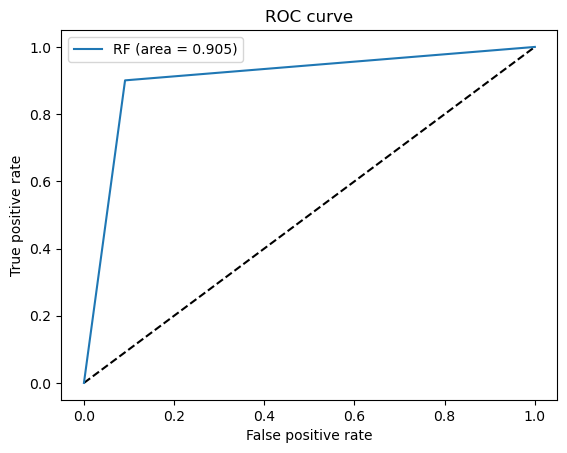

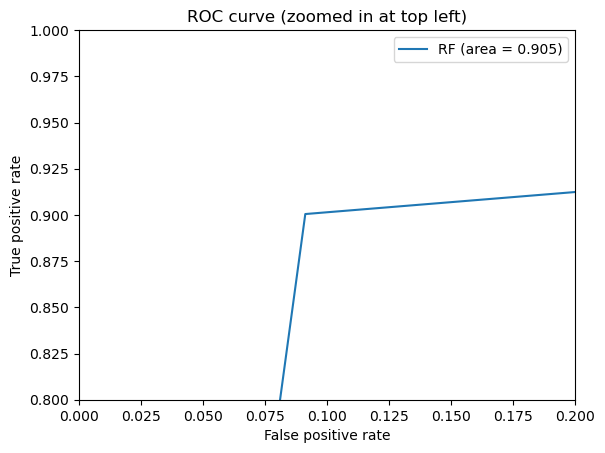

In [28]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [29]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

In [30]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve (y_test_numeric, y_pred_rf_numeric)

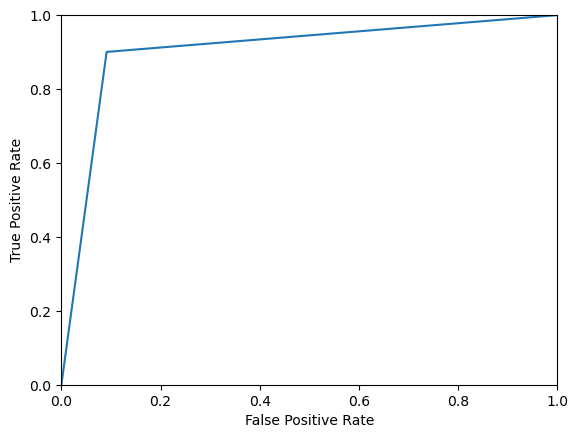

In [31]:
plot_roc_curve (fpr,tpr)

In [32]:
roc_auc_score(y_test_numeric, y_pred_rf_numeric)

0.9046442616574712

0.9046442616574712


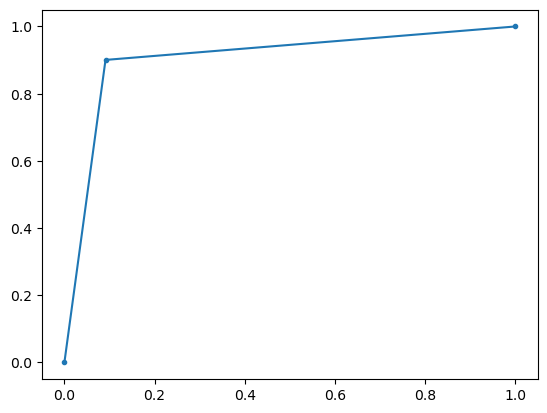

In [33]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test_numeric, y_pred_rf_numeric)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [34]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [35]:
perf_measure(y_test_numeric, y_pred_rf_numeric)

(380, 30, 299, 42)

# Menampilkan Data Salah Prediksi

In [36]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    TP_indices = []
    TN_indices = []
    FP_indices = []
    FN_indices = []

    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
            TP_indices.append(i)
        elif y_hat[i] == 1 and y_actual[i] != y_hat[i]:  # False Positive
            FP += 1
            FP_indices.append(i)
        elif y_actual[i] == y_hat[i] == 0:
            TN += 1
            TN_indices.append(i)
        elif y_hat[i] == 0 and y_actual[i] != y_hat[i]:  # False Negative
            FN += 1
            FN_indices.append(i)

    return TP, FP, TN, FN, TP_indices, FP_indices, TN_indices, FN_indices

In [37]:
perf_measure(y_test_numeric, y_pred_rf_numeric)

(380,
 30,
 299,
 42,
 [0,
  1,
  4,
  5,
  7,
  8,
  9,
  10,
  12,
  13,
  14,
  15,
  16,
  17,
  21,
  24,
  26,
  33,
  34,
  35,
  38,
  43,
  45,
  46,
  47,
  48,
  50,
  55,
  57,
  63,
  64,
  65,
  66,
  67,
  70,
  72,
  74,
  75,
  76,
  78,
  82,
  83,
  84,
  86,
  89,
  90,
  92,
  93,
  94,
  95,
  97,
  98,
  99,
  104,
  107,
  109,
  112,
  113,
  114,
  120,
  121,
  124,
  126,
  129,
  131,
  133,
  134,
  136,
  137,
  138,
  139,
  141,
  144,
  151,
  153,
  154,
  157,
  162,
  163,
  165,
  166,
  167,
  172,
  174,
  176,
  177,
  180,
  184,
  188,
  190,
  191,
  193,
  194,
  195,
  197,
  198,
  199,
  200,
  202,
  204,
  205,
  208,
  210,
  212,
  213,
  216,
  217,
  219,
  225,
  229,
  231,
  232,
  233,
  235,
  237,
  238,
  239,
  242,
  245,
  247,
  249,
  250,
  251,
  252,
  254,
  257,
  259,
  263,
  264,
  265,
  266,
  267,
  269,
  270,
  271,
  272,
  273,
  275,
  277,
  279,
  280,
  281,
  282,
  283,
  284,
  287,
  289,
  290,
  

In [38]:
# Calculate the performance metrics and retrieve indices for FP and FN
TP, FP, TN, FN, TP_indices, FP_indices, TN_indices, FN_indices = perf_measure(y_test_numeric, y_pred_rf_numeric)

# Select the FP and FN data from the dataset
FP_data = df.iloc[FP_indices][['id-berita', 'url', 'content per paragraf', 'content_stopwords']]
FN_data = df.iloc[FN_indices][['id-berita', 'url', 'content per paragraf', 'content_stopwords']]

In [39]:
# Display the results
print("False Positives (FP):")
print(FP_data)
print('Jumlah dari FP adalah',len(FP_data), 'paragraf.')

print("\nFalse Negatives (FN):")
print(FN_data)
print('Jumlah dari FN adalah',len(FN_data), 'paragraf.')

False Positives (FP):
     id-berita                                                url  \
20         231  https://tekno.sindonews.com/read/799655/776/ma...   
36         235  https://tekno.sindonews.com/read/787787/776/zi...   
44         237  https://tekno.sindonews.com/read/778473/776/be...   
169        255  https://tekno.sindonews.com/read/733149/776/la...   
179        256  https://tekno.sindonews.com/read/715303/776/ga...   
222        260  https://tekno.sindonews.com/read/702041/776/as...   
224        260  https://tekno.sindonews.com/read/702041/776/as...   
243        264  https://tekno.sindonews.com/read/688539/776/ga...   
278        268  https://tekno.sindonews.com/read/683585/776/re...   
296        269  https://tekno.sindonews.com/read/673687/776/ep...   
307        271  https://tekno.sindonews.com/read/655545/776/6-...   
324        272  https://tekno.sindonews.com/read/653809/776/in...   
329        273  https://tekno.sindonews.com/read/641045/776/as...   
359        2

In [40]:
import os
# Contoh folder baru untuk simpan file
folder_name = 'Salah deteksi'

# Buat folder baru jika belum ada
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [42]:
# Specify the folder path
folder_path = 'E:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Mine/4 Terbaik (70-30)/Salah deteksi'  # Replace this with your desired folder path

# Full paths for saving files
fp_file_path = os.path.join(folder_path, 'FP_FastText-RF.csv')
fn_file_path = os.path.join(folder_path, 'FN_FastText-RF.csv')

# Save FP_data and FN_data to CSV files within the specified folder
FP_data.to_csv(fp_file_path, index=False)
FN_data.to_csv(fn_file_path, index=False)

### TN & TP

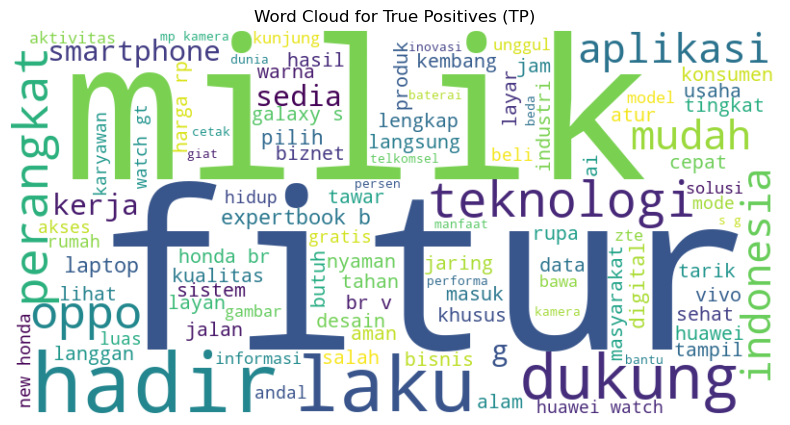

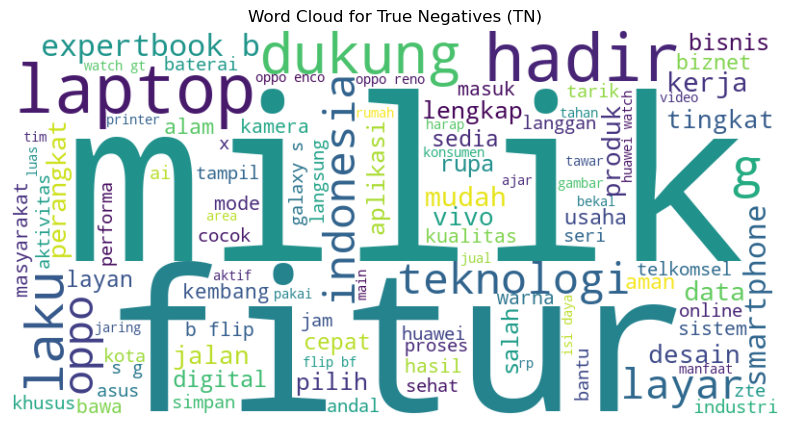

In [43]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil data TP dan TN dari dataset
TP_data = df.iloc[TP_indices]['content_stopwords']
TN_data = df.iloc[TN_indices]['content_stopwords']

# Gabungkan teks dari TP dan TN
tp_text = " ".join(paragraph for paragraph in TP_data)
tn_text = " ".join(paragraph for paragraph in TN_data)

# Fungsi untuk membuat dan menampilkan word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat word cloud untuk True Positives
plot_wordcloud(tp_text, "Word Cloud for True Positives (TP)")

# Membuat word cloud untuk True Negatives
plot_wordcloud(tn_text, "Word Cloud for True Negatives (TN)")

### FN & FP

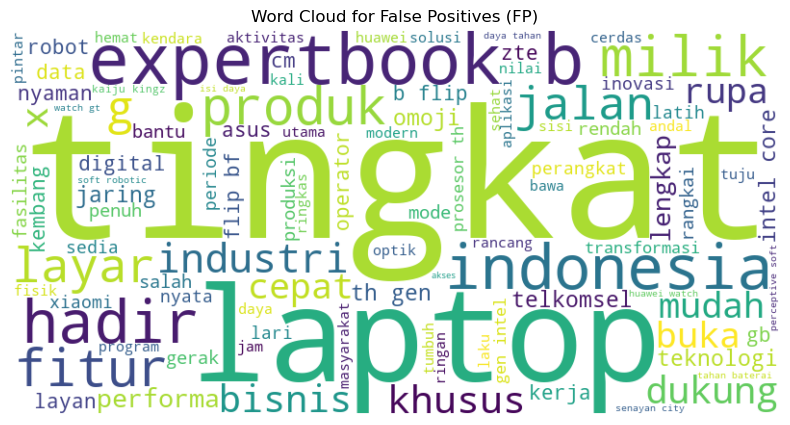

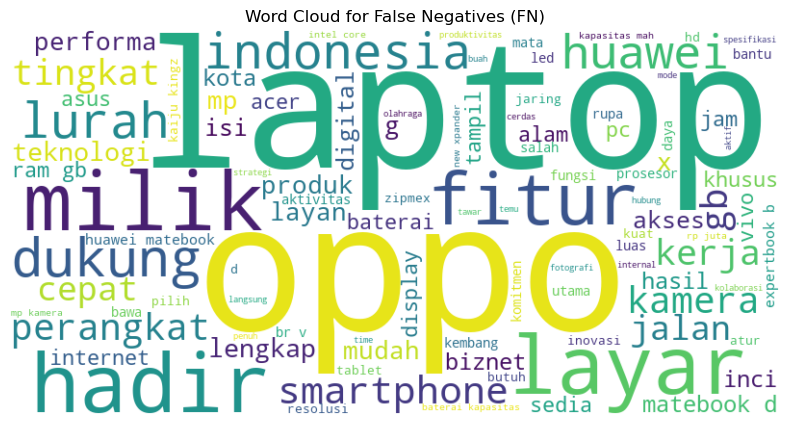

In [44]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam kolom 'content per paragraf' untuk FP dan FN
fp_text = " ".join(paragraph for paragraph in FP_data['content_stopwords'])
fn_text = " ".join(paragraph for paragraph in FN_data['content_stopwords'])

# Fungsi untuk membuat dan menampilkan word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat word cloud untuk False Positives
plot_wordcloud(fp_text, "Word Cloud for False Positives (FP)")

# Membuat word cloud untuk False Negatives
plot_wordcloud(fn_text, "Word Cloud for False Negatives (FN)")